In [1]:
import numpy as np

## Task1

In [2]:
blosum50 =np.loadtxt('blosum50.txt', dtype=int)
print(blosum50)

[[ 5 -2 -1 -2 -1 -1 -1  0 -2 -1 -2 -1 -1 -3 -1  1  0 -3 -2  0]
 [-2  7 -1 -2 -4  1  0 -3  0 -4 -3  3 -2 -3 -3 -1 -1 -3 -1 -3]
 [-1 -1  7  2 -2  0  0  0  1 -3 -4  0 -2 -4 -2  1  0 -4 -2 -3]
 [-2 -2  2  8 -4  0  2 -1 -1 -4 -4 -1 -4 -5 -1  0 -1 -5 -3 -4]
 [-1 -4 -2 -4 13 -3 -3 -3 -3 -2 -2 -3 -2 -2 -4 -1 -1 -5 -3 -1]
 [-1  1  0  0 -3  7  2 -2  1 -3 -2  2  0 -4 -1  0 -1 -1 -1 -3]
 [-1  0  0  2 -3  2  6 -3  0 -4 -3  1 -2 -3 -1 -1 -1 -3 -2 -3]
 [ 0 -3  0 -1 -3 -2 -3  8 -2 -4 -4 -2 -3 -4 -2  0 -2 -3 -3 -4]
 [-2  0  1 -1 -3  1  0 -2 10 -4 -3  0 -1 -1 -2 -1 -2 -3  2 -4]
 [-1 -4 -3 -4 -2 -3 -4 -4 -4  5  2 -3  2  0 -3 -3 -1 -3 -1  4]
 [-2 -3 -4 -4 -2 -2 -3 -4 -3  2  5 -3  3  1 -4 -3 -1 -2 -1  1]
 [-1  3  0 -1 -3  2  1 -2  0 -3 -3  6 -2 -4 -1  0 -1 -3 -2 -3]
 [-1 -2 -2 -4 -2  0 -2 -3 -1  2  3 -2  7  0 -3 -2 -1 -1  0  1]
 [-3 -3 -4 -5 -2 -4 -3 -4 -1  0  1 -4  0  8 -4 -3 -2  1  4 -1]
 [-1 -3 -2 -1 -4 -1 -1 -2 -2 -3 -4 -1 -3 -4 10 -1 -1 -4 -3 -3]
 [ 1 -1  1  0 -1  0 -1  0 -1 -3 -3  0 -2 -3 -1  5  2 -4

In [3]:
blosum_index_map = dict(zip(['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V'],[i for i in range(len(blosum50))]))

def get_blosum_score(a,b):
    
    return blosum50[blosum_index_map[a],blosum_index_map[b]]


print(get_blosum_score('H','P'))


-2


In [4]:
def needleman_wunsch(protein1,protein2):
    d = -8
    width = len(protein1)+1
    heigh = len(protein2)+1
    matrix = np.zeros((heigh,width))
    path = []
    for i in range(1,heigh):
        matrix[i,0] = matrix[i-1,0]+d
    for j in range(1,width):
        matrix[0,j] = matrix[0,j-1]+d
    for i in range(1,heigh):
        for j in range(1,width):
            matrix[i,j] = max(matrix[i-1,j]+d,matrix[i,j-1]+d,matrix[i-1,j-1]+get_blosum_score(protein1[j-1],protein2[i-1]))
    i = heigh-1
    j = width-1
    # path add point coordinate and matrix value and add how to get this point
    while i>0 or j>0:
        if i>0 and j>0 and matrix[i,j] == matrix[i-1,j-1]+get_blosum_score(protein1[j-1],protein2[i-1]):
            path.append((i-1,j-1,matrix[i,j],'diagonal'))
            i-=1
            j-=1
        elif i>0 and matrix[i,j] == matrix[i-1,j]+d:
            path.append((i-1,j,matrix[i,j],'up'))
            i-=1
        elif j>0 and matrix[i,j] == matrix[i,j-1]+d:
            path.append((i,j-1,matrix[i,j],'left'))
            j-=1
            
    # get protein1 and protein2 alignment 
    protein1_alignment = ''
    protein2_alignment = ''
    for i in range(len(path)-1,-1,-1):
        if path[i][3] == 'diagonal':
            protein1_alignment += protein1[path[i][1]]
            protein2_alignment += protein2[path[i][0]]
        elif path[i][3] == 'up':
            protein1_alignment += '-'
            protein2_alignment += protein2[path[i][0]]
        elif path[i][3] == 'left':
            protein1_alignment += protein1[path[i][1]]
            protein2_alignment += '-'
    return path,matrix, protein1_alignment, protein2_alignment
     
print(needleman_wunsch('HEAGAWGHEE','PAWHEAE'))
print(needleman_wunsch('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL','PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY'))

    

([(6, 9, 1.0, 'diagonal'), (5, 9, -5.0, 'up'), (4, 8, 3.0, 'diagonal'), (3, 7, -3.0, 'diagonal'), (3, 6, -13.0, 'left'), (2, 5, -5.0, 'diagonal'), (1, 4, -20.0, 'diagonal'), (1, 3, -25.0, 'left'), (0, 2, -17.0, 'diagonal'), (0, 1, -16.0, 'left'), (0, 0, -8.0, 'left')], array([[  0.,  -8., -16., -24., -32., -40., -48., -56., -64., -72., -80.],
       [ -8.,  -2.,  -9., -17., -25., -33., -41., -49., -57., -65., -73.],
       [-16., -10.,  -3.,  -4., -12., -20., -28., -36., -44., -52., -60.],
       [-24., -18., -11.,  -6.,  -7., -15.,  -5., -13., -21., -29., -37.],
       [-32., -14., -18., -13.,  -8.,  -9., -13.,  -7.,  -3., -11., -19.],
       [-40., -22.,  -8., -16., -16.,  -9., -12., -15.,  -7.,   3.,  -5.],
       [-48., -30., -16.,  -3., -11., -11., -12., -12., -15.,  -5.,   2.],
       [-56., -38., -24., -11.,  -6., -12., -14., -15., -12.,  -9.,   1.]]), 'HEAGAWGHE-E', '--P-AW-HEAE')
([(33, 33, 7.0, 'up'), (32, 32, 15.0, 'diagonal'), (31, 31, 10.0, 'diagonal'), (30, 30, 12.0, 'dia

## Task2


In [5]:
def smith_waterman(protein1,protein2):
    d = -8
    height = len(protein2)+1
    width = len(protein1)+1
    
    matrix = np.zeros((height,width))
    # smith waterman algorithm achieve
    for i in range(1,height):
        for j in range(1,width):
            matrix[i,j] = max(0,matrix[i-1,j]+d,matrix[i,j-1]+d,matrix[i-1,j-1]+get_blosum_score(protein1[j-1],protein2[i-1]))
    # get max value and max value coordinate
    max_value = 0
    max_value_coordinate = (0,0)
    for i in range(height):
        for j in range(width):
            if matrix[i,j]>max_value:
                max_value = matrix[i,j]
                max_value_coordinate = (i,j)
    # get path
    path = []
    i = max_value_coordinate[0]
    j = max_value_coordinate[1]
    while True:
        if i>0 and j>0 and matrix[i,j] == matrix[i-1,j-1]+get_blosum_score(protein1[j-1],protein2[i-1]):
            path.append((i-1,j-1,matrix[i,j],'diagonal'))
            i-=1
            j-=1
        elif i>0 and matrix[i,j] == matrix[i-1,j]+d:
            path.append((i-1,j,matrix[i,j],'up'))
            i-=1
        elif j>0 and matrix[i,j] == matrix[i,j-1]+d:
            path.append((i,j-1,matrix[i,j],'left'))
            j-=1
        else:
            break
    # get protein1 and protein2 alignment
    protein1_alignment = ''
    protein2_alignment = ''
    for i in range(len(path)-1,-1,-1):
        if path[i][3] == 'diagonal':
            protein1_alignment += protein1[path[i][1]]
            protein2_alignment += protein2[path[i][0]]
        elif path[i][3] == 'up':
            protein1_alignment += '-'
            protein2_alignment += protein2[path[i][0]]
        elif path[i][3] == 'left':
            protein1_alignment += protein1[path[i][1]]
            protein2_alignment += '-'
    return path,matrix, protein1_alignment, protein2_alignment

print(smith_waterman('HEAGAWGHEE','PAWHEAE'))
print(smith_waterman( "MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY","TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI"))


([(4, 8, 28.0, 'diagonal'), (3, 7, 22.0, 'diagonal'), (3, 6, 12.0, 'left'), (2, 5, 20.0, 'diagonal'), (1, 4, 5.0, 'diagonal')], array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5.,  0.,  5.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  0., 20., 12.,  4.,  0.,  0.],
       [ 0., 10.,  2.,  0.,  0.,  0., 12., 18., 22., 14.,  6.],
       [ 0.,  2., 16.,  8.,  0.,  0.,  4., 10., 18., 28., 20.],
       [ 0.,  0.,  8., 21., 13.,  5.,  0.,  4., 10., 20., 27.],
       [ 0.,  0.,  6., 13., 18., 12.,  4.,  0.,  4., 16., 26.]]), 'AWGHE', 'AW-HE')
([(45, 44, 273.0, 'diagonal'), (44, 43, 268.0, 'diagonal'), (43, 42, 261.0, 'diagonal'), (42, 41, 256.0, 'diagonal'), (41, 40, 251.0, 'diagonal'), (40, 39, 243.0, 'diagonal'), (39, 38, 230.0, 'diagonal'), (38, 37, 220.0, 'diagonal'), (37, 36, 213.0, 'diagonal'), (36, 35, 208.0, 'diagonal'), (35, 34, 200.0, 'diagonal'), (34, 33, 195.0, 'di

## Task3 BLAST algorithm
These are my results of the BLAST sequence comparison for the Pax6 mouse protein and eyeless protein for fruit flies

In [6]:
result = open('output.txt', 'r').read()
print(result)

CLUSTAL O(1.2.4) multiple sequence alignment


tr|O96791|O96791_DROME      NVIAMRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDEC	60
sp|P63015|PAX6_MOUSE        --------------------------------------------------------MQNS	4
                                                                                     ::.

tr|O96791|O96791_DROME      HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI-------------------	101
sp|P63015|PAX6_MOUSE        HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETG	64
                            ************.****************************                   

tr|O96791|O96791_DROME      ------------------------------------------------------------	101
sp|P63015|PAX6_MOUSE        SIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSIN	124
                                                                                        

tr|O96791|O96791_DROME      ------------------------------------------------------------	101
sp|P63015|PAX6_MOUSE        RVLRNLAS

## Task4
In this approach, two functions are called on each other, representing the change of state. When the sequence of observations is processed, the final recursive stack is returned, containing a list of tuples for each string part generated by the state, and a string describing the state to which the part belongs


In [7]:
def HMM(length):
        
    #equal probability of starting in either the AT state or the CG state
    if(np.random.choice([True, False], p = [0.5, 0.5])):
        return generate_CGrich_region(length, [])
    else:
        return generate_ATrich_region(length, [])
def generate_ATrich_region(n_remaining, accumulator):
    nuc_bases = ["A", "T", "C", "G"]
    #emission probabilities for each of the nucleotide bases respectively
    #when in this state
    emission_probs = [0.2698, 0.3237, 0.2080, 0.1985]
    
    #a continuous section that will be built up whilst in this state
    section_str = ""
    
    #loop until we change into the other state by chance 
    while True:
        
        #whole recursive call finished and can be returned
        if n_remaining == 0:
            accumulator.append((section_str, "AT_rich"))
            return accumulator
        
        section_str += np.random.choice(nuc_bases, p = emission_probs)
        n_remaining -= 1
        
        #on each iteration we may by chance finish in this state
        #and go into the other state
        if np.random.choice([True, False], p = [0.0002, 0.9998]):
            break
    
    accumulator.append((section_str, "AT_rich"))
    return generate_CGrich_region(n_remaining, accumulator)
def generate_CGrich_region(n_remaining, accumulator):
    nuc_bases = ["A", "T", "C", "G"]
    #emission probabilities for each of the nucleotide bases respectively
    #when in this state
    emission_probs = [0.2459, 0.2079, 0.2478, 0.2984]
    
    #a continuous section that will be built up whilst in this state
    section_str = ""
    
    #loop until we change into the other state by chance
    while True:
        
        #whole recursive call finished and can be returned
        if n_remaining == 0:
            accumulator.append((section_str, "CG_rich"))
            return accumulator
    
        section_str += np.random.choice(nuc_bases, p = emission_probs)
        n_remaining -= 1
        
        #on each iteration we may by chance finish in this state
        #and go into the other state
        if np.random.choice([True, False], p = [0.0003, 0.9997]):
            break
    
    accumulator.append((section_str, "CG_rich"))
    return generate_ATrich_region(n_remaining, accumulator)  

result = HMM(20000)
og_seq = "".join(["".join(i[0]) for i in result])
print(og_seq)
for code, state in result:
    print(state)


GAAAGTGTATTGTTGCTAATCCCGTTGTCTATGATAATCGTTCTGTGCAAGATGCCTGGGGGCTAGTTCAGGAGGGTATTTCAAGAATCCTTGTTTTGTCCAACGCTAGCAATGACCACCACACCCATTTAAAGTAGGTCAACAGTAGCTTAGTTAACGTCTAAACGATAATCGTAGCCCTAGAATAACTCAGGTGAACACCCCCGAACATCATACTACGCTTTTTCGACGTTCTTCAGATCGGTATTTTTCTGTACTCCATAGATACTCAAAGTTCTTGAATATAAAAATAGCAACTTTAATGAATGTCCCAGTAACGGATTCTGTCTCGAAAGATATACAGTAGGAGTGAATATATCTTACGATGAATTTTCCTGCTAGGAGGTGATTTTCGGTATTTGACTATCTTTCGTCATAAATCTAAGAATCCTACCAATTTCTCGTGACACTGTCTCCTCCCTGTAATCCAAATAATTGTTTTTTTTTCGGATCTTATTAATTTCTCGGCTCCCTATACACAGTTATCGCAGTTTGTGTACTTTATAAGTGTCTTAATCTAGAGTCCCTTGACTAATTAAAGGGGAATAATGGCGTAATCATTTCGCATATTCTAGGCAACACCTTCTTGTTCAAGTGTCGTGTAGCGGGTATCCCAATTAAATGTTCTTCAATGAATATTGATTTATGATGCCATGTCCCGAAACTTTTCTAACACATAATTATCCCTTAAATAAGCTGTTCACGTATGATTTTAACAAAGATTCTTCTATATCACCCGTGTGTAAATCCAGTTTTCTTATGATTGTAATCGTCCCTGCTGCTTGCGCAGCACTCACAGAGGGGTATAGTCGAGGTAACTCTATTTTCGTAGATTGTACCCCAAACATAGCACTTACAAAAGTATGTTGTCGGTTCCTACATCGTGATCAATTAACTATAGTAGCTTGTAATAAGGCAGGTCTAGCTACATAATGGTTATCTAACAATTGAGCCCCTCTCA

## Task5


['CG' 'CG' 'CG' ... 'CG' 'CG' 'CG']


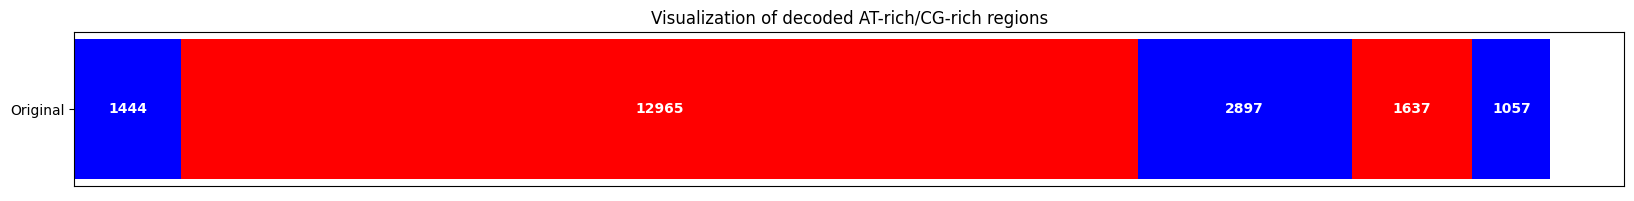

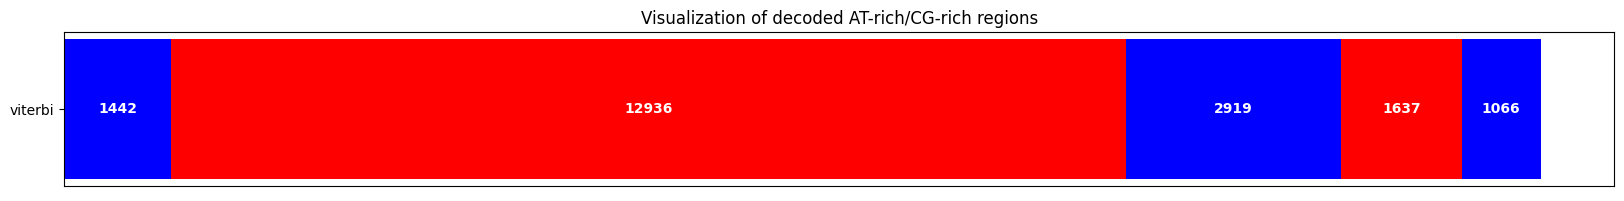

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def logviterbi(sequence, startprob_, transmat_, emissionprob_):
    # integer assignments to nucleotide bases for easier index access
    nucleotides_dict = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
    states_dict = {0: 'AT', 1: 'CG'}
    # change all probability to log
    startprob_ = np.log(startprob_)
    transmat_ = np.log(transmat_)
    emissionprob_ = np.log(emissionprob_)
    
    # number of states
    K = transmat_.shape[0]
    # length of observation sequence
    T = len(sequence)
    
    T1 = np.empty((K, T), 'd')
    T2 = np.empty((K, T), 'B')
    
    # initial probabilities for first observation
    T1[:, 0] = startprob_ + emissionprob_[:, nucleotides_dict[sequence[0]]]
    T2[:, 0] = 0
        
    for i in range(1, T):
        probability = T1[:, i-1] + transmat_.T + emissionprob_[np.newaxis, :, nucleotides_dict[sequence[i]]].T
        T1[:, i] = np.max(probability, axis=1)
        T2[:, i] = np.argmax(probability, axis=1)
    
    # output sequence
    z = np.empty(T, 'B')
    x = np.empty(T, dtype='<U2')
    z[-1] = np.argmax(T1[:, T-1])
    x[-1] = states_dict[z[-1]]
    for i in reversed(range(1, T)):
        z[i-1] = T2[z[i], i]
        x[i-1] = states_dict[z[i-1]]
    
    return x


startprob_ = np.array([0.5, 0.5])
transmat_ = np.array([[0.9998, 0.0002], [0.0003, 0.9997]])
emissionprob_ = np.array([[0.2698, 0.3237, 0.208, 0.1985], [0.2459, 0.2079, 0.2478, 0.2984]])

result = HMM(20000)
sequence = "".join(["".join(i[0]) for i in result])
decoded_sequence = logviterbi(sequence, startprob_, transmat_, emissionprob_)
print(decoded_sequence)


length =[]
for code, state in result:
    length = length+[(len(code),state)]

# This function takes a sequence of tuples or a string as input and returns a list of tuples.
# Each tuple contains the length of a section (AT or CG) and the corresponding section type ("AT_rich" or "CG_rich").
# If the input is a string, the function identifies AT-rich and CG-rich regions and returns a list of tuples.
# If the input is already a list of tuples, the function returns the same list without any modification.
def get_section_info(input):
    
    if(type(input[0]) is tuple): # if the input is a list of tuples, return it without modification
        return input
    else: # if the input is a string, identify AT-rich and CG-rich regions and return a list of tuples
        i = 0
        sections = []
        while i < len(input):
            if input[i] == 'AT':
                size = 0
                while i < len(input) and input[i] == 'AT':
                    size += 1
                    i += 1
                sections.append((size, "AT_rich"))
                continue
            if input[i] == 'CG':
                size = 0
                while i < len(input) and input[i] == 'CG':
                    size += 1
                    i += 1
                sections.append((size, "CG_rich"))
        return sections


# This function takes a list of tuples as input and returns a list of colors (red or blue).
# The colors correspond to the type of each section in the input list (AT_rich or CG_rich).
def gen_colour_arr(tups):
    states = list(map(lambda tup: tup[1], tups))
    colours = []
    for state in states:
        if state == "AT_rich":
            colours.append("red")
        else:
            colours.append("blue")
    return colours


# This function takes a list of tuples as input and returns a list of x-positions for each rectangle.
# The x-positions correspond to the starting position (left) of each section in the input list.
def get_x_poses(tuples):
    y_pos_arr = [0]
    for i in range(len(tuples) - 1):
        y_pos_arr.append(tuples[i][0] + y_pos_arr[-1])
    return y_pos_arr


# This function takes a label and a list of tuples as input 
# and generates a horizontal bar chart to visualize the sequence.
# The label is used as the y-axis label of the chart.
# The tuples correspond to the sections of the sequence and are used to generate the rectangles in the chart.
def visualize(label, tuples):
    phage_widths = list(map(lambda x: x[0], tuples))
    phage_lefts = get_x_poses(tuples)
    phage_colors = gen_colour_arr(tuples)
    phage_centers = []
    for i in range(len(phage_widths)):
        phage_centers.append((phage_widths[i] / 2) + phage_lefts[i])
    fig, ax = plt.subplots(figsize = (20,2))
    ax.barh([label],
        phage_widths, left = phage_lefts, color = phage_colors)
    for i in range(len(phage_centers)):
            ax.text(phage_centers[i], 0, phage_widths[i], ha = "center", va = "center", color = "white",
                    fontsize = "medium", fontweight = "bold")
    ax.get_xaxis().set_visible(False)        
    ax.title.set_text("Visualization of decoded AT-rich/CG-rich regions")

    
visualize("Original", length)
decoded = get_section_info(decoded_sequence)
visualize("viterbi", decoded)



In [9]:
import numpy as np

def forward_algorithm(observation, states, start_prob, trans_prob, emit_prob):
    T = len(observation)
    ln_v = [{}]
    ln_v[0]['F'] = 0
    ln_v[0]['L'] = -np.inf
    for t in range(1, T):
        ln_v.append({})
        for state_i in states:
            logprob = []
            for state_j in states:
                logprob.append(ln_v[t-1][state_j] + np.log(trans_prob[state_j][state_i]))
            max_logprob = max(logprob)
            if observation[t] in emit_prob[state_i]:
                ln_emit_prob = np.log(emit_prob[state_i][observation[t]])
            else:
                ln_emit_prob = -np.inf
            ln_v[t][state_i] = max_logprob + ln_emit_prob
    return ln_v


observation = (0,5,4,6,6)
states = ('F', 'L')
start_prob = {'F': 0.5, 'L': 0.5}
trans_prob = {'F': {'F': 0.9, 'L': 0.1}, 
              'L': {'F': 0.1, 'L': 0.9}}
emit_prob = {'F': {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6},
             'L': {1: 1/10, 2: 1/10, 3: 1/10, 4: 1/10, 5: 1/10, 6: 1/2}}

ln_v = forward_algorithm(observation, states, start_prob, trans_prob, emit_prob)
print(ln_v)


[{'F': 0, 'L': -inf}, {'F': -1.8971199848858813, 'L': -4.605170185988091}, {'F': -3.7942399697717626, 'L': -6.502290170873971}, {'F': -5.691359954657644, 'L': -6.789972243325753}, {'F': -7.588479939543525, 'L': -7.588479939543524}]


In [10]:
fasta_file = 'phaseLambda.fasta'
phage_lambda_seq = open("phaseLambda.fasta", 'r').read().replace('\n', '')
print(phage_lambda_seq)

startprob_ = np.array([0.5, 0.5])
transmat_ = np.array([[0.9998, 0.0002], [0.0003, 0.9997]])
emissionprob_ = np.array([[0.2698, 0.3237, 0.208, 0.1985], [0.2459, 0.2079, 0.2478, 0.2984]])


phage_lambda = logviterbi(phage_lambda_seq,startprob_,transmat_,emissionprob_)


np.savetxt('phaseLambda.out', phage_lambda, fmt='%s', newline=',')
print(phage_lambda)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

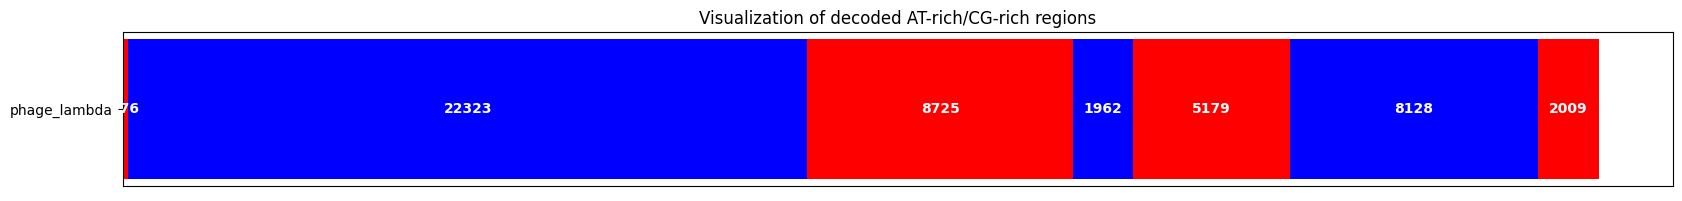

In [11]:
phage_lambda = get_section_info(phage_lambda)
visualize("phage_lambda", phage_lambda)